In [1]:
import tensorflow
import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

C:\Users\laris\anaconda3\envs\dsip_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\laris\anaconda3\envs\dsip_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\laris\anaconda3\envs\dsip_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\laris\anaconda3\envs\dsip_env\lib\site-packages\tensorf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.manifold import TSNE
from sklearn import preprocessing, svm 

In [4]:
!pip install seaborn

In [5]:
import seaborn as sns

In [6]:
# dataset = pd.read_csv(r"C:\Users\laris\Documents\Facultate\DSIP\fraud_and_nonfraud.csv")

In [7]:
dataset= pd.read_csv(r"C:\Users\laris\Documents\Facultate\DSIP\fraud_and_nonfraud_imb.csv")

## Short Exploratory Data Analysis ##

In [8]:
len(dataset.columns) # we have 18 columns

18

In [9]:
dataset.columns # see the columns of the dataset

Index(['paymentMethod_cvv', 'paymentMethod_cardNumber', 'amount_currency',
       'amount_value', 'channel', 'deviceDetails_browser',
       'deviceDetails_device', 'deviceDetails_deviceIp',
       'merchantRefTransactionId', 'paymentMethod_apmType',
       'paymentMethod_cardSubType', 'paymentMethod_cardType',
       'paymentMethod_expiryMonth', 'paymentMethod_expiryYear',
       'paymentMethod_expiryDay', 'transaction_time', 'class',
       'paymentMethod_encodedPaymentToken'],
      dtype='object')

In [10]:
dataset.head(10) # a snippet of how that dataset looks like

,paymentMethod_cvv,paymentMethod_cardNumber,amount_currency,amount_value,channel,deviceDetails_browser,deviceDetails_device,deviceDetails_deviceIp,merchantRefTransactionId,paymentMethod_apmType,paymentMethod_cardSubType,paymentMethod_cardType,paymentMethod_expiryMonth,paymentMethod_expiryYear,paymentMethod_expiryDay,transaction_time,class,paymentMethod_encodedPaymentToken
0,411,3125-1681-5389-4599,EURO,402557.06,pos,chrome,pc,36.157.92.211,6746465483,nfcc,Student,Visa,3,2020,12,17:55:0,0,rLOAItxm
1,744,8160-0212-0590-6597,EURO,529371.09,mobile,chrome,pc,253.15.57.225,2539868996,magstripe,Student,American Express,3,2020,5,19:55:5,0,tiZgtCle
2,988,1042-1951-0377-6407,USD,467630.54,pos,edge,pc,185.24.212.72,6410588737,nfcc,Business,Visa,10,2020,11,17:13:34,0,CyYupBmv
3,59,3804-4171-9826-9892,USD,423606.36,virtual,chrome,mobile,40.104.98.201,6349067268,magstripe,Business,Visa,10,2019,22,9:38:13,0,pXKjyWIB
4,158,3609-3088-5762-0315,USD,333271.64,pos,chrome,pos,34.252.48.98,3270828114,chip,Prepaid,JCB,4,2020,19,13:56:40,0,xkOYuxgw
5,184,9854-9584-1774-7273,EURO,284696.91,online,chrome,pc,56.188.1.6,6711248440,magstripe,Business,Visa,8,2020,24,4:43:57,0,LUgsSIRn
6,223,2177-6777-0477-4458,EURO,546789.39,pos,mozilla,pc,222.155.141.23,6458558034,chip,Prepaid,Discover,4,2019,4,5:25:31,0,uCLMxOOT
7,10,4035-4858-6944-1722,EURO,559969.29,online,edge,mobile,56.199.125.172,3606279978,magstripe,Student,Visa,4,2019,6,3:53:47,0,vurqXpqn
8,981,6576-6931-0277-7509,USD,413966.70,mobile,edge,pos,235.114.129.97,3338079080,magstripe,Business,Visa,9,2020,6,22:13:54,0,FSkFcpGN
9,955,8997-9153-5484-5281,USD,239500.23,mobile,edge,pos,236.165.10.73,8505557776,magstripe,Student,American Express,7,2019,5,16:48:44,0,hrPDXugO


In [11]:
dataset.dtypes #let's check the type of each column
                # we have 7 int columns, 1 float and 10 categorical columns

paymentMethod_cvv                      int64
paymentMethod_cardNumber              object
amount_currency                       object
amount_value                         float64
channel                               object
deviceDetails_browser                 object
deviceDetails_device                  object
deviceDetails_deviceIp                object
merchantRefTransactionId               int64
paymentMethod_apmType                 object
paymentMethod_cardSubType             object
paymentMethod_cardType                object
paymentMethod_expiryMonth              int64
paymentMethod_expiryYear               int64
paymentMethod_expiryDay                int64
transaction_time                      object
class                                  int64
paymentMethod_encodedPaymentToken     object
dtype: object

In [12]:
dataset.info() # a more detailed view, we can see that we may no have null row, let's double check anyway

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922500 entries, 0 to 922499
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   paymentMethod_cvv                  922500 non-null  int64  
 1   paymentMethod_cardNumber           922500 non-null  object 
 2   amount_currency                    922500 non-null  object 
 3   amount_value                       922500 non-null  float64
 4   channel                            922500 non-null  object 
 5   deviceDetails_browser              922500 non-null  object 
 6   deviceDetails_device               922500 non-null  object 
 7   deviceDetails_deviceIp             922500 non-null  object 
 8   merchantRefTransactionId           922500 non-null  int64  
 9   paymentMethod_apmType              922500 non-null  object 
 10  paymentMethod_cardSubType          922500 non-null  object 
 11  paymentMethod_cardType             9225

In [13]:
dataset.isnull().values.any() # it seems that the dataset has ideed no null values

False

In [14]:
dataset.describe()  # let's check the range of column values, it seems that they are on different scales. this should be taken into account on further steps

,paymentMethod_cvv,amount_value,merchantRefTransactionId,paymentMethod_expiryMonth,paymentMethod_expiryYear,paymentMethod_expiryDay,class
count,922500.000000,922500.000000,9.225000e+05,922500.00000,922500.00000,922500.000000,922500.000000
mean,496.376330,381864.102198,4.995952e+09,6.56922,2019.49935,14.491022,0.024390
std,284.557231,184463.990998,2.886251e+09,3.45681,0.50000,8.076117,0.154258
min,0.000000,2.860000,1.941900e+04,1.00000,2019.00000,1.000000,0.000000
25%,244.000000,223766.890000,2.492023e+09,4.00000,2019.00000,7.000000,0.000000
50%,499.000000,382414.115000,4.991835e+09,7.00000,2019.00000,14.000000,0.000000
75%,737.000000,540887.070000,7.497111e+09,10.00000,2020.00000,21.000000,0.000000
max,999.000000,699999.600000,9.999992e+09,12.00000,2020.00000,28.000000,1.000000


In [15]:
# let's see the fraud/non fraud percentages in the dataset
# the dataset is an unbalanced one, 25% being fraudulent transactions and 75% being normal transactions

class_df = dataset['class'].value_counts().to_frame().reset_index()
class_df['percentages'] = class_df['class'].apply(lambda val: round(100*float(val)/len(dataset), 2))
class_df

,index,class,percentages
0,0,900000,97.56
1,1,22500,2.44


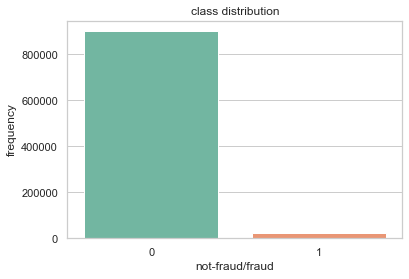

In [16]:
sns.set(style='whitegrid')
sns.barplot(x=dataset['class'].value_counts().index, y=dataset['class'].value_counts().values, palette='Set2')
plt.xlabel('not-fraud/fraud')
plt.ylabel('frequency')
plt.title('class distribution')
plt.show()

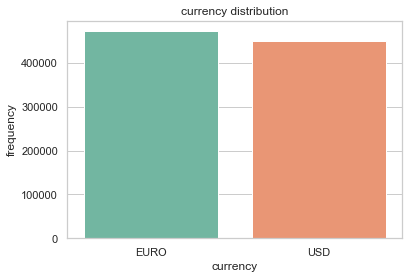

In [18]:
sns.set(style='whitegrid')
sns.barplot(x=dataset['amount_currency'].value_counts().index, y=dataset['amount_currency'].value_counts().values, palette='Set2')
plt.xlabel('currency')
plt.ylabel('frequency')
plt.title('currency distribution')
plt.show()

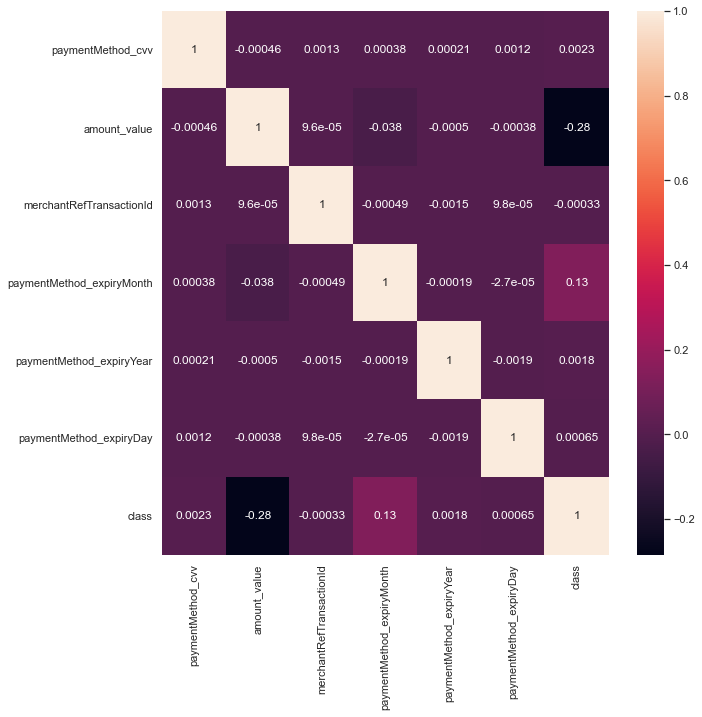

In [19]:
# let's see if there are some correlations between the features
# apparently there are no strong correlations between the features

plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [20]:
def apply_leading_zeros(row):
    h, m, s = row.split(':')
    return f"{int(h):02d}:{int(m):02d}:{int(s):02d}"

In [21]:
#fix transaction_time column display

dataset['transaction_time'] = dataset['transaction_time'].apply(apply_leading_zeros, 1)

print(dataset['transaction_time'])

0         17:55:00
1         19:55:05
2         17:13:34
3         09:38:13
4         13:56:40
            ...   
922495    16:40:00
922496    15:43:34
922497    03:41:27
922498    19:13:54
922499    00:27:59
Name: transaction_time, Length: 922500, dtype: object


In [22]:
#transform transaction time in seconds
def get_seconds(row):
    h, m, s = row.split(':')
    seconds = int(h)*360 + int(m)*60 + int(s)
    return seconds

In [23]:
dataset['transaction_time'] = dataset['transaction_time'].apply(get_seconds, 1)
dataset['transaction_time']

0          9420
1         10145
2          6934
3          5533
4          8080
          ...  
922495     8160
922496     8014
922497     3567
922498     7674
922499     1679
Name: transaction_time, Length: 922500, dtype: int64

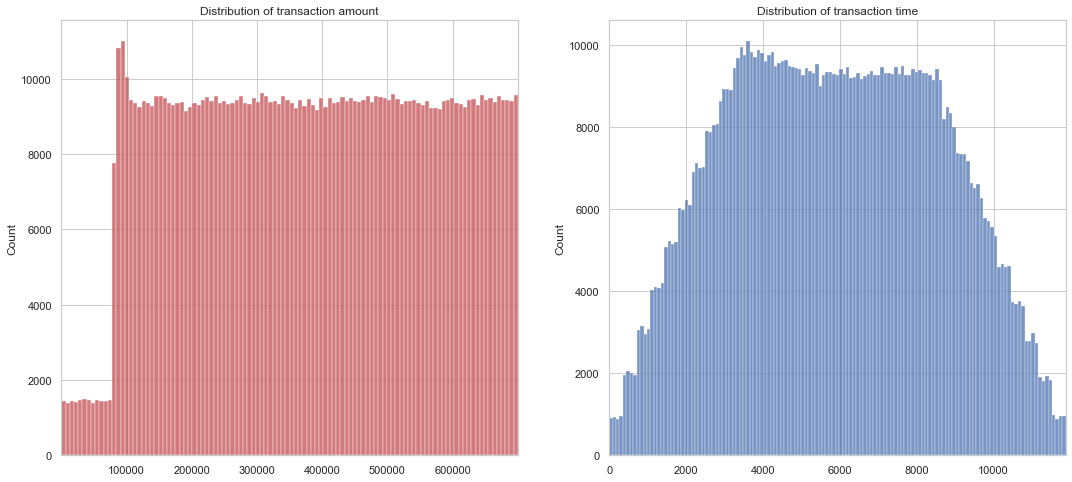

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.histplot(dataset['amount_value'].values, ax=ax[0], color='r')
ax[0].set_title('Distribution of transaction amount')
ax[0].set_xlim([min(dataset['amount_value'].values), max(dataset['amount_value'].values)])

sns.histplot(dataset['transaction_time'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of transaction time')
ax[1].set_xlim([min(dataset['transaction_time'].values), max(dataset['transaction_time'].values)])

plt.show()

# we can observe from the plots that we have a lot of transactions whose amount were ~ 100k 
# also, a lot of transactions were made between 2000-4000 sec => 7 - 11 AM

## Dealing with unballanced dataset ##


Popular approaches:
 - leaving it as it is
 - undersampling
 - oversampling
 

## Undersampling approach ##

In [25]:
non_fraud = dataset[dataset['class'] == 0].sample(1000)
fraud = dataset[dataset['class'] == 1].sample(250)

df = non_fraud.append(fraud).reset_index(drop=True)
X = df.drop(['class'], axis=1)

#we select only the numerical columns
X_small = X[['amount_value', 'merchantRefTransactionId', 'paymentMethod_cvv', 'paymentMethod_expiryMonth', 'paymentMethod_expiryYear', 'transaction_time']]
X_small = X_small.values

Y = df['class'].values
X

,paymentMethod_cvv,paymentMethod_cardNumber,amount_currency,amount_value,channel,deviceDetails_browser,deviceDetails_device,deviceDetails_deviceIp,merchantRefTransactionId,paymentMethod_apmType,paymentMethod_cardSubType,paymentMethod_cardType,paymentMethod_expiryMonth,paymentMethod_expiryYear,paymentMethod_expiryDay,transaction_time,paymentMethod_encodedPaymentToken
0,828,5818-5143-1855-0239,EURO,501295.86,mobile,edge,mobile,151.118.67.78,5917249478,magstripe,Student,Visa,10,2019,6,6107,qVZbqKKm
1,321,1954-9563-0821-2600,USD,343637.11,mobile,edge,mobile,66.188.250.120,9571597804,magstripe,Student,American Express,4,2020,26,7081,MFDyFwPU
2,287,1777-5912-0052-9308,EURO,420260.01,online,edge,mobile,138.152.119.170,4391002072,magstripe,Prepaid,American Express,10,2019,8,5373,JuWvwyMs
3,558,7705-7019-3934-4009,EURO,210856.23,pos,chrome,pos,45.36.117.249,4984854051,chip,Secured,American Express,1,2020,20,4885,QzlrMIZB
4,741,8149-3140-7487-8413,USD,96016.27,pos,edge,pos,46.23.102.134,4757313841,nfcc,Student,JCB,5,2019,8,3332,XJaDjyeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,962,5461-1449-3209-1915,EURO,31776.87,online,chrome,mobile,251.249.250.147,4979134117,chip,Student,Visa,7,2019,2,838,ogBYaIOw
1246,690,3116-5790-0384-9630,EURO,42417.59,online,edge,mobile,24.143.209.240,3404196515,magstripe,Student,Visa,7,2019,9,2594,syWKcZnt
1247,905,1848-8118-1296-7375,EURO,88082.03,online,chrome,mobile,3.239.15.119,9917439066,nfcc,Student,Visa,11,2020,23,4355,tNySHAmZ
1248,801,7272-9307-3201-4570,EURO,83954.98,online,chrome,mobile,97.216.162.97,6251959443,chip,Business,Visa,12,2020,21,3130,OdEUDXVK


In [26]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1) # fits the data into a 2D embedded space

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc=name)
    plt.savefig("graph.png")
    plt.show()
    

In [27]:
Y.dtype

dtype('int64')

C:\Users\laris\anaconda3\envs\dsip_env\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'original.png'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


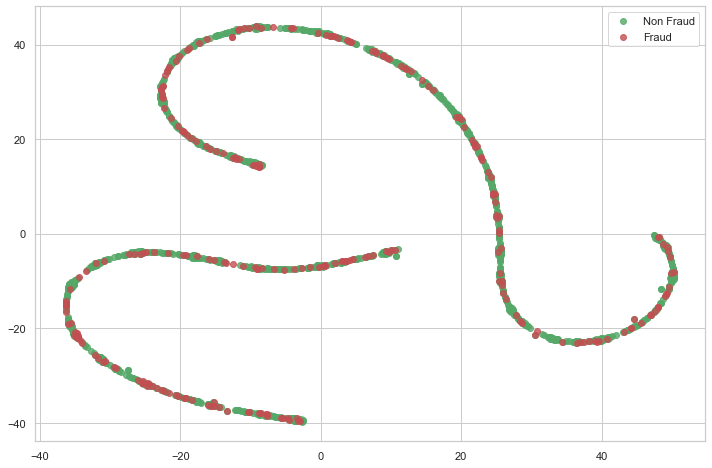

In [28]:
tsne_plot(X_small, Y, "original.png") # here we can see that the fraud and non fraud transactions are very close to each other, so it's difficult to classify them

In [29]:
len(X.columns)

17

In [30]:
#encode the categorical features, scale the data
#TODO: try standardization also, check the results

# unable to do the above due to memory allocation, so we one-hot encode fewer features

# #get list of categorical features
# categorical_features = [col for col in list(dataset.columns) if col not in ['amount_value', 'merchantRefTransactionId', 'paymentMethod_cvv', 'paymentMethod_expiryDay', 'paymentMethod_expiryMonth', 'paymentMethod_expiryYear', 'transaction_time', 'class']]
# categorical_features

# #one-hot encoding the categorical features
# dataset[categorical_features] = dataset[categorical_features].astype('category')

# encoded_feats = pd.get_dummies(dataset[categorical_features])

# print(encoded_feats)
# X = dataset.drop(categorical_features, axis=1)
# len(X.columns)
# X = pd.concat([X, encoded_feats], axis=1)
# len(X.columns)

# Y = dataset['class'].values

# X[X.columns] = preprocessing.MinMaxScaler().fit_transform(X.values)
# # X['amount_value'].min()  # just checking
# X_norm, X_fraud = X[Y == 0], X[Y == 1]

In [31]:
#get list of categorical features
categorical_features_selected = ['amount_currency', 'channel', 'deviceDetails_device', 'paymentMethod_cardSubType',
                        'deviceDetails_browser', 'paymentMethod_cardType']

categorical_features_all = [col for col in list(dataset.columns) if col not in ['amount_value', 'merchantRefTransactionId', 'paymentMethod_cvv', 'paymentMethod_expiryDay', 'paymentMethod_expiryMonth', 'paymentMethod_expiryYear', 'transaction_time', 'class']]

#one-hot encoding the categorical features
dataset[categorical_features_all] = dataset[categorical_features_all].astype('category')

encoded_feats = pd.get_dummies(dataset[categorical_features_selected]) 

# print(encoded_feats)
X = dataset.drop(categorical_features_all, axis=1)
len(X.columns)
X = pd.concat([X, encoded_feats], axis=1)

Y = dataset['class'].values

X[X.columns] = preprocessing.MinMaxScaler().fit_transform(X.values)
# X['amount_value'].min()  # just checking
X_norm, X_fraud = X[Y == 0], X[Y == 1]

print(len(X.columns))  #we will continue with 31 features
print(X.columns)

31
Index(['paymentMethod_cvv', 'amount_value', 'merchantRefTransactionId',
       'paymentMethod_expiryMonth', 'paymentMethod_expiryYear',
       'paymentMethod_expiryDay', 'transaction_time', 'class',
       'amount_currency_EURO', 'amount_currency_USD', 'channel_mobile',
       'channel_online', 'channel_pos', 'channel_virtual',
       'deviceDetails_device_mobile', 'deviceDetails_device_pc',
       'deviceDetails_device_pos', 'paymentMethod_cardSubType_Business ',
       'paymentMethod_cardSubType_Generic',
       'paymentMethod_cardSubType_Prepaid ',
       'paymentMethod_cardSubType_Secured',
       'paymentMethod_cardSubType_Student', 'deviceDetails_browser_chrome',
       'deviceDetails_browser_chromio', 'deviceDetails_browser_edge',
       'deviceDetails_browser_mozilla',
       'paymentMethod_cardType_American Express',
       'paymentMethod_cardType_Discover', 'paymentMethod_cardType_JCB',
       'paymentMethod_cardType_MasterCard', 'paymentMethod_cardType_Visa'],
      dtype

In [103]:
# first NN
#TODO: try other activation functions, see how it performs

from keras.models import Sequential
from keras.layers import Dense

autoencoder_model = Sequential()
#encoding part
autoencoder_model.add(Dense(25, input_dim=X.shape[1], activation='relu'))
autoencoder_model.add(Dense(15, activation='tanh'))
autoencoder_model.add(Dense(5, activation='relu'))

#decoding part
autoencoder_model.add(Dense(15, activation='tanh'))
autoencoder_model.add(Dense(25, activation='relu'))

autoencoder_model.add(Dense(X.shape[1], activation='linear'))


In [104]:
#compile the model
# https://ml-cheatsheet.readthedocs.io/en/latest/optimizers.html

# autoencoder_model.compile(loss='mse', optimizer='rmsprop')
autoencoder_model.compile(loss='mse', optimizer='adam')

In [105]:
X_fraud

,paymentMethod_cvv,amount_value,merchantRefTransactionId,paymentMethod_expiryMonth,paymentMethod_expiryYear,paymentMethod_expiryDay,transaction_time,class,amount_currency_EURO,amount_currency_USD,...,paymentMethod_cardSubType_Student,deviceDetails_browser_chrome,deviceDetails_browser_chromio,deviceDetails_browser_edge,deviceDetails_browser_mozilla,paymentMethod_cardType_American Express,paymentMethod_cardType_Discover,paymentMethod_cardType_JCB,paymentMethod_cardType_MasterCard,paymentMethod_cardType_Visa
62,0.024024,0.019894,0.982044,0.545455,1.0,0.296296,0.121475,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
135,0.446446,0.088575,0.742520,0.545455,0.0,0.888889,0.293291,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
139,0.353353,0.139507,0.869788,1.000000,0.0,1.000000,0.368465,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
200,0.599600,0.139846,0.854917,0.545455,0.0,0.814815,0.162051,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
238,0.636637,0.093251,0.572214,0.909091,1.0,0.629630,0.244886,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922385,0.535536,0.072468,0.809699,0.909091,0.0,0.925926,0.349693,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
922444,0.475475,0.028137,0.334825,1.000000,0.0,0.777778,0.324017,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
922445,0.251251,0.023833,0.990210,0.636364,0.0,0.629630,0.080899,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
922469,0.417417,0.060896,0.269428,0.545455,0.0,0.444444,0.109858,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
callbacks = []
callbacks.append(EarlyStopping(monitor='val_loss',  # if the loss is no longer decreasing, stop the training
                               min_delta=0, 
                               mode='min', 
                               patience=5)) # Number of epochs with no improvement after which training will be stopped.
callbacks.append(ModelCheckpoint('autoencoder_model.h5',
                                 monitor='val_mse',
                                 save_weights_only=False, 
                                 save_best_only=True,
                                 mode='min'))

In [117]:
# train the network; tried with 256 batches also, 2k observations
history = autoencoder_model.fit(X_norm[0:4000], X_norm[0:4000], batch_size = 64,
                epochs = 20, validation_split = 0.20, callbacks=callbacks, initial_epoch=0) # 20% of the data will be used for validation

Train on 3200 samples, validate on 800 samples
Epoch 1/20
3200/3200 [==============================] - 0s 27us/step - loss: 0.1288 - val_loss: 0.1273
Epoch 2/20
3200/3200 [==============================] - 0s 18us/step - loss: 0.1241 - val_loss: 0.1238
Epoch 3/20
3200/3200 [==============================] - 0s 18us/step - loss: 0.1212 - val_loss: 0.1215
Epoch 4/20
3200/3200 [==============================] - 0s 23us/step - loss: 0.1187 - val_loss: 0.1184


C:\Users\laris\anaconda3\envs\dsip_env\lib\site-packages\keras\callbacks.py:707: RuntimeWarning: Can save best model only with val_mse available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 5/20
3200/3200 [==============================] - 0s 22us/step - loss: 0.1161 - val_loss: 0.1159
Epoch 6/20
3200/3200 [==============================] - 0s 19us/step - loss: 0.1139 - val_loss: 0.1131
Epoch 7/20
3200/3200 [==============================] - 0s 21us/step - loss: 0.1107 - val_loss: 0.1090
Epoch 8/20
3200/3200 [==============================] - 0s 26us/step - loss: 0.1068 - val_loss: 0.1057
Epoch 9/20
3200/3200 [==============================] - 0s 23us/step - loss: 0.1039 - val_loss: 0.1031
Epoch 10/20
3200/3200 [==============================] - 0s 23us/step - loss: 0.1012 - val_loss: 0.1009
Epoch 11/20
3200/3200 [==============================] - 0s 21us/step - loss: 0.0988 - val_loss: 0.0986
Epoch 12/20
3200/3200 [==============================] - 0s 22us/step - loss: 0.0967 - val_loss: 0.0967
Epoch 13/20
3200/3200 [==============================] - 0s 23us/step - loss: 0.0948 - val_loss: 0.0946
Epoch 14/20
3200/3200 [==============================] - 0s 20us/step

In [ ]:
#try VAE


In [118]:
# obtain the latent representation
hidden_representation = Sequential()
hidden_representation.add(autoencoder_model.layers[0])
hidden_representation.add(autoencoder_model.layers[1])
hidden_representation.add(autoencoder_model.layers[2])

In [119]:
norm_hid_rep = hidden_representation.predict(X_norm[4000:6000])
fraud_hid_rep = hidden_representation.predict(X_fraud[0:2000])

C:\Users\laris\anaconda3\envs\dsip_env\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'latent_representation.png'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


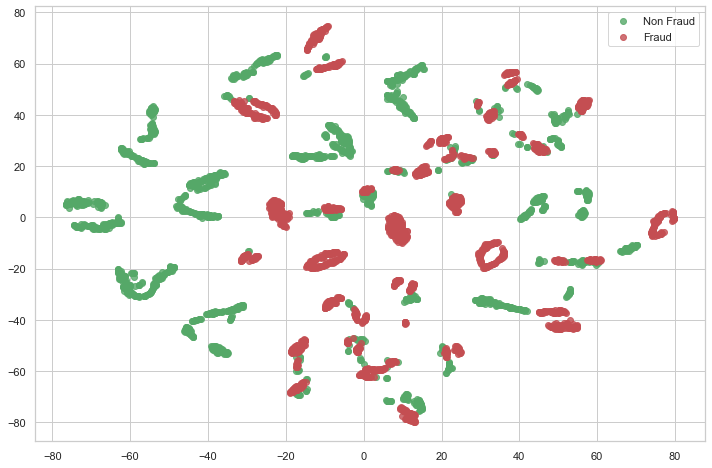

In [120]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

In [148]:
#now, having this latent representation, we can train a simple classifier
#first we split the dataset

x_train, x_test, y_train, y_test = train_test_split(rep_x, rep_y, test_size=0.3)
#30% of the data we use for test <=> 120 samples for test, 3880 for training 


2800

## 1.1 Applying Logistic Regression ##

In [123]:
#helper functions

def show_evaluation_metrics(model, x_test, y_test, y_pred):
    plot_confusion_matrix(model, x_test, y_test)
    
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1 score: {f1_score(y_test, y_pred)}")


              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74       613
         1.0       0.72      0.82      0.77       587

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.75      1200
weighted avg       0.76      0.76      0.75      1200

Accuracy: 0.755
F1 score: 0.7670364500792393


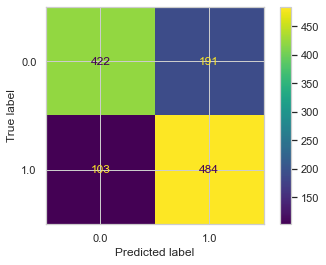

In [124]:
logistic_reg = LogisticRegression().fit(x_train, y_train)
y_pred = logistic_reg.predict(x_test)

show_evaluation_metrics(logistic_reg, x_test, y_test, y_pred)

## 1.2 Applying Random Forest ##

In [125]:
#let's tune some hyperparams of the Random Forest model

param_grid = {'n_estimators' : [10, 20, 40, 80, 100],
              'max_depth' : [2, 4, 6, 8, 16, 25, 20]}


rf_model = RandomForestClassifier() #define model, default for n_estimators is 100

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid)
grid_search.fit(x_train, y_train)

print(f" Best params: {grid_search.best_params_ }") # see the best hyperparams


 Best params: {'max_depth': 25, 'n_estimators': 40}


              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       613
         1.0       0.96      0.98      0.97       587

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

Accuracy: 0.9708333333333333
F1 score: 0.9705634987384357


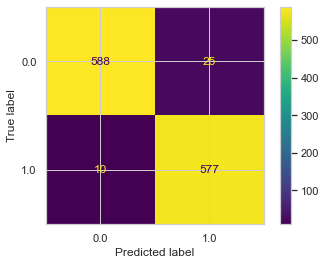

In [126]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=16)
rf_model.fit(x_train, y_train) #fit on trainset
y_pred = rf_model.predict(x_test)


show_evaluation_metrics(rf_model, x_test, y_test, y_pred)

## 1.3 Applying Decision Trees ##

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       613
         1.0       0.96      0.96      0.96       587

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

Accuracy: 0.9625
F1 score: 0.9615713065755764


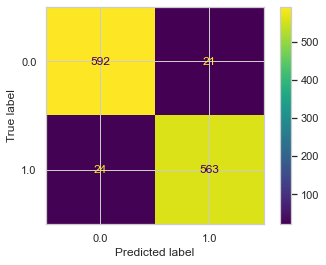

In [127]:
decision_trees_model = DecisionTreeClassifier()
decision_trees_model.fit(x_train, y_train)
y_pred = decision_trees_model.predict(x_test)

show_evaluation_metrics(decision_trees_model, x_test, y_test, y_pred)

## 1.4 Applying SVM ##

https://towardsdatascience.com/support-vector-machine-explained-8d75fe8738fd

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88       613
         1.0       0.82      1.00      0.90       587

    accuracy                           0.89      1200
   macro avg       0.91      0.89      0.89      1200
weighted avg       0.91      0.89      0.89      1200

Accuracy: 0.8925
F1 score: 0.9009976976208749


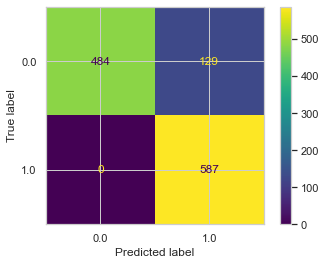

In [131]:
svc_model = svm.SVC() #'rbf' kernel is used by default, for a task that is not linearly separable
svc_model.fit(x_train, y_train)

y_pred = svc_model.predict(x_test)

show_evaluation_metrics(svc_model, x_test, y_test, y_pred)

## Conclusions ##

- which algos perform better (judging by the F1 score): Random Forest, Decision Trees, SVM, Linear Regression - (97%; 76%); similar results to the ones found on the Kaggle competition
- why the use on nn and unsupervised learning: embeddings - I wanted to see if we can learn a hidden respresentation of the features (like PCA or SVD) that can be further used as an input to classification machine learning algorithms 
- use of small fraction of data. even though we had a huge amount of non-fraudulent data, DL usually can be trained with small datasets also. I've used 2k/4k for training and testing. 

## Further Steps: ##
- fine-tune hyperparameters (for the autoencoder, for the rest of the classifiers)
- try VAE (variational autoencoder)
- try other classif algos
- undersampling/oversampling remove/not remove the autoencoder part